Testing the lower bound graph

In [17]:
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGenerator, ContactGraphGeneratorParams
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
import logging
logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger("large_gcs.geometry.convex_set").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
import numpy as np
import matplotlib.pyplot as plt


INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 178.70it/s]
INFO:large_gcs.graph.contact_graph:Loading 20 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 192 sets...
100%|██████████| 192/192 [00:00<00:00, 2826.88it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 194/194 [00:00<00:00, 33572.43it/s]
INFO:large_gcs.graph.graph:Adding 194 vertices to graph...
100%|██████████| 194/194 [00:00<00:00, 42769.78it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 8328/8328 [00:00<00:00, 29412.89it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 8328/8328 [00:00<00:00, 18124.49it/s]
INFO:large_gcs.graph.graph:Adding 8328 edges to graph...
100%|██████████| 8328/8328 [00:00<00:00, 14737.16it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 12), n_vertices=194, n_edges=8328, source=[array([-2,  0]), array([ 0, -2])], target='regio

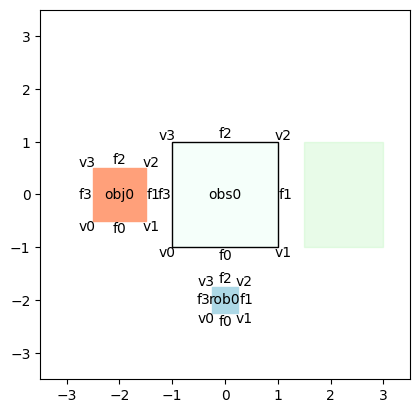

In [18]:
graph_name = "cg_simple_4"
graph_file = ContactGraphGeneratorParams.graph_file_path_from_name(
    graph_name
)
cg = ContactGraph.load_from_file(
    graph_file,
    should_use_l1_norm_vertex_cost=True,
)
source_vertex = cg.source
target_vertex = cg.target
cg.plot()

In [25]:
# New Source
from large_gcs.contact.contact_regions_set import ContactRegionsSet
from large_gcs.contact.contact_set import ContactPointSet
from large_gcs.geometry.polyhedron import Polyhedron

obj_pos = [[-2,-2]]
rob_pos = [[2,2]]
new_source_set = ContactPointSet("source", objects=cg.objects, robots=cg.robots, object_positions=obj_pos, robot_positions=rob_pos)
cg.source_pos = obj_pos + rob_pos

# New Target
contact_region_params = [ContactRegionParams(
    region_vertices=[[-1, -1], [1, -1], [1, 1], [-1, 1]],
    obj_indices=[0],)]
target_regions = [
    Polyhedron.from_vertices(params.region_vertices) for params in contact_region_params
]
cg.target_region_params = contact_region_params
cg.target_regions = target_regions
new_target_set = ContactRegionsSet(name="target", objects=cg.objects, robots=cg.robots, contact_region_params=contact_region_params)
cg.plot()


ValueError: operands could not be broadcast together with shapes (4,) (4,2) 

In [ ]:
# for v in cg.vertices:
#     print(v)
#     cg.generate_and_plot_samples_in_set(v, 20)

In [3]:
from large_gcs.graph.lower_bound_graph import LowerBoundGraph


lbg=LowerBoundGraph.load_from_name(graph_name)

# lbg = LowerBoundGraph.generate_from_gcs(graph_name, cg)

In [4]:
lbg._graph = cg


In [5]:
lbg._adjacency_list

defaultdict(list,
            {("('IC|obj0_f3-rob0_f1',)",
              "('IC|obj0_f0-rob0_f2',)",
              "('IC|obj0_f1-rob0_f3',)"): [("('IC|obj0_f1-rob0_f3',)",
               "('IC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f3-rob0_f1',)"),
              ("('NC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f1-rob0_f3',)")],
             ("('IC|obj0_f1-rob0_f3',)",
              "('IC|obj0_f0-rob0_f2',)",
              "('IC|obj0_f3-rob0_f1',)"): [("('IC|obj0_f3-rob0_f1',)",
               "('IC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f1-rob0_f3',)"),
              ("('NC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f0-rob0_f2',)",
               "('IC|obj0_f3-rob0_f1',)")],
             ("('NC|obj0_f0-rob0_f2',)",
              "('IC|obj0_f0-rob0_f2',)",
              "('IC|obj0_f1-rob0_f3',)"): [("('IC|obj0_f1-rob0_f3',)",
               "('IC|obj0_f0-rob0_f2',)",
               "('NC|obj0_f0-rob0_f2',)"),
            

In [ ]:
# construct adjacency list
# from copy import copy

# from tqdm import tqdm


# edges = copy(lbg._edges)
# lbg._edges = {}
# for (u, v), c in tqdm(edges.items(), total=len(edges)):
#     lbg.add_edge(u, v, c)

In [6]:
len([c for c in lbg._edges.values() if c>0])

160

In [8]:
len([c for c in lbg._edges.values() if c==0])

280

In [ ]:
# for (u, v), c in lbg._edges.items():
#     if c == 0:
#         continue
#     print(f"{c}: {u} -> {v}")
#     pos_v = lbg._vertices[v].point
#     pos_u = lbg._vertices[u].point
#     cg.plot(show_source=False)
#     cg.robots[0].plot_at_position(pos_u, color="red")
#     cg.robots[0].plot_at_position(pos_v, color="blue")
#     plt.show()

In [ ]:
# lbg.save_to_file(lbg.lbg_file_path)

In [9]:
lbg._parent_vertex_to_vertices["target"]

[]

In [10]:
source_vertex

Vertex(convex_set=<large_gcs.contact.contact_set.ContactPointSet object at 0x7b1280367ca0>, costs=[], constraints=[], gcs_vertex=<pydrake.geometry.optimization.GraphOfConvexSets.Vertex object at 0x7b11fa3059f0>)

In [11]:
lbg.update_lbg(parent_vertex_name="source", parent_vertex=source_vertex)
lbg.update_lbg(parent_vertex_name="target", parent_vertex=target_vertex)


DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 10/10 [00:00<00:00, 42.29batch/s]
DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 10/10 [00:00<00:00, 68.67batch/s]


In [12]:
lbg.run_dijkstra("target")

DEBUG:large_gcs.graph.lower_bound_graph:Q size: 1
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 6
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 6
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 7
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 8
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 10
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 9
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 10
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 11
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 12
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 12
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 13
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 13
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 14
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 15
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 16
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 17
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 18
DEBUG:large_gcs.graph.lower_bound_graph:Q size: 19
DEBUG:large_gcs.graph.lower_bound_gra

In [13]:
len(lbg._g)

162

In [ ]:
# lbg._vertices[("","","source")]
# lbg.outgoing_edges(("","","source"))

In [ ]:
# lbg._g

In [14]:
len(lbg._parent_vertex_to_vertices["target"])

1

In [15]:
lbg._parent_vertex_to_vertices["target"]

[('', '', 'target')]

In [16]:
# How many g values are greater than 0?
nonzero_cost_vertices = [(key,x) for (key,x) in lbg._g.items() if x > 0]
print(len(nonzero_cost_vertices))

112


In [ ]:
sorted_vertices = sorted(nonzero_cost_vertices, key=lambda x: x[1])

In [ ]:
# sort vertices by cost
# 
# for v, c in sorted_vertices:
#     pos = lbg._vertices[v].point
#     cg.plot(show_source=False)
#     cg.robots[0].plot_at_position(pos)
    
#     print(lbg._vertices[v].point, c, v)
#     plt.show()
